In [1]:
from dv import AedatFile
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from Utilities import *

In [2]:
labels = pd.read_csv('./DvsGesture/user01_fluorescent_labels.csv')
with AedatFile('./DvsGestureAEDAT4/user01_fluorescent.aedat4') as f:
    # events will be a named numpy array
    events = np.hstack([packet for packet in f['events'].numpy()])

    # Access information of all events by type
    timestamps, x, y, polarities = events['timestamp'], events['x'], events['y'], events['polarity']

In [3]:
def listToTensor(timestamps, x, y, polarities,width,height,deltaT):
    timeSlices = np.ceil((timestamps[-1]-timestamps[0])/deltaT)
    npTensor = np.zeros((timeSlices.astype(int),height,width))
    tensorIndex = 0
    initialIndex = 0
    while (initialIndex < timestamps.shape[0]):
        finalIndex = initialIndex
        while ((finalIndex < timestamps.shape[0]) and (timestamps[finalIndex] < timestamps[initialIndex] + deltaT)):
            finalIndex = finalIndex + 1
        for i in range(initialIndex,finalIndex):
            if (polarities[i]==0):
                npTensor[tensorIndex,y[i],x[i]] = -1
            else:
                npTensor[tensorIndex,y[i],x[i]] = 1
        tensorIndex = tensorIndex+1
        initialIndex = finalIndex+1
    return npTensor

In [4]:
test = listToTensor(timestamps,x,y,polarities,128,128,10000)

In [5]:
imgs = (test[:,:,:]/2+0.5)*255

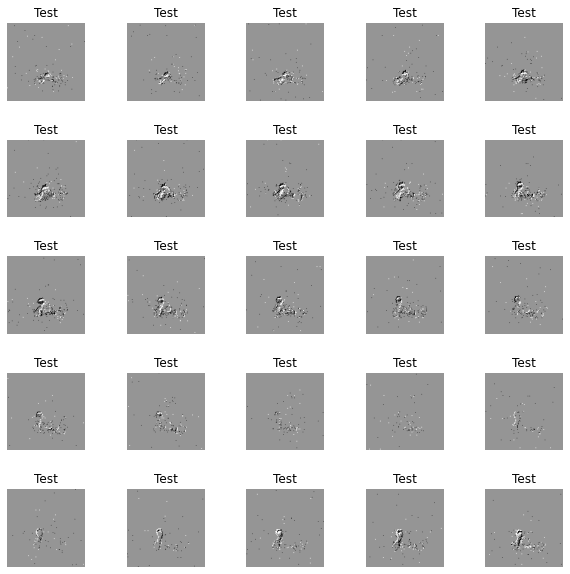

In [11]:
PlotImages(100,25,5,5,imgs,np.zeros((125)).astype(int),['Test'],color=False)

In [7]:
labels

class  startTime_usec  endTime_usec
0       1        80048239      85092709
1       2        89431170      95231007
2       3        95938861     103200075
3       4       114845417     123499505
4       5       124344363     131742581
5       6       133660637     141880879
6       7       142360393     149138239
7       8       150717639     157362334
8       8       157773346     164029864
9       9       165057394     171518239
10     10       172843790     179442817
11     11       180675853     187389051

In [10]:
timestamps[-1]-timestamps[0]

114170024

In [9]:
187389051-80048239

107340812

In [7]:
# Here we import everything we need for the project
%matplotlib inline

import os

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Sklearn
from sklearn.model_selection import train_test_split # Helps with organizing data for training
from sklearn.metrics import confusion_matrix # Helps present results as a confusion-matrix

In [8]:
 # Turn imgs and labels into np.array to speed up train_test_split
X = np.array(imgs, dtype="uint8")
X = X.reshape(len(imgs), 120, 320, 1) # Needed to reshape so CNN knows it's different images
y = np.array(labels)

print("Images loaded: ", len(X))
print("Labels loaded: ", len(y))

print(y[0], imagepaths[0]) # Debugging

NameError: name 'imgs' is not defined

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=42)

NameError: name 'X' is not defined

In [10]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten

Using TensorFlow backend.


In [11]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(120, 320, 1))) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [12]:
# Configures the model for training
model.compile(optimizer='adam', # Optimization routine, which tells the computer how to adjust the parameter values to minimize the loss function.
              loss='sparse_categorical_crossentropy', # Loss function, which tells us how bad our predictions are.
              metrics=['accuracy']) # List of metrics to be evaluated by the model during training and testing.

In [13]:
# Trains the model for a given number of epochs (iterations on a dataset) and validates it.
model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=2, validation_data=(X_test, y_test))

NameError: name 'X_train' is not defined